In [3]:
import pandas as pd   #to read a dataset
import numpy as np     #if we use a numerical values
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.figsize"]=(10,5)


In [6]:
df=pd.read_csv("/content/WC_AT.csv")
df

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [8]:
df

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [9]:
df=df[["Waist","AT"]]
df

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


## **correlation analysis**

<Axes: xlabel='Waist', ylabel='AT'>

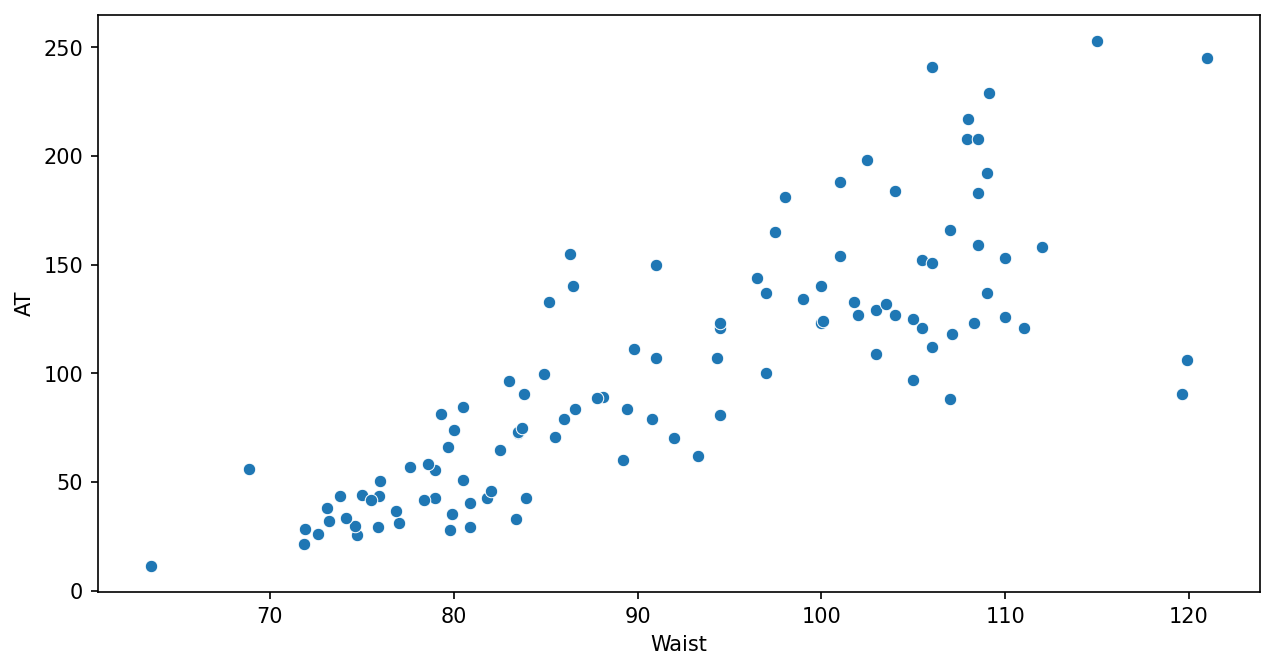

In [10]:
sns.scatterplot(x=df["Waist"],y=df["AT"])

In [19]:
df.corr()  #allow only numerical cilumn here we get matrix form,#here we ger 95% so very good prediction model

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<Axes: >

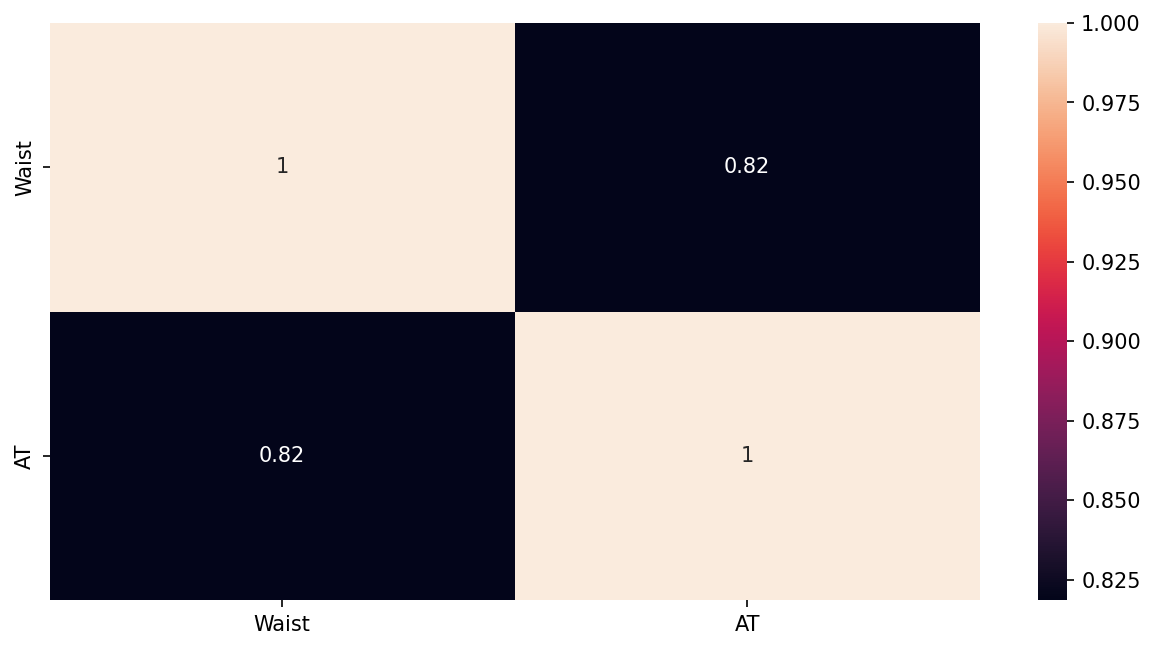

In [11]:
sns.heatmap(df.corr(),annot=True)

## **fitting a linear regression**


In [26]:
#statsmodels library is used for multiple purpose like statistical calculation,hypothesis testing,linear regreesion
import statsmodels.formula.api as smf #model-regression model "y~x"or "dependent variable~independent variable"
model=smf.ols("AT~Waist",data=df).fit() #ordinary least squares y dep.variable sunday then give~symbol
#dataset-data,fit()-fit the regression line,#ols module give all the calculation output in a backend

In [27]:
#coefficient are c or b0 and m or b1
model.params
#reg.equn:sunday = b0+b1*daily
#m=3.45
#c=-215.981488
#sunday=13.83+1.33*daily
#we asummed daily circulation as 200
#so sunday =13.83+1.33*200 ,B0=13.8356,B1=1.339715

,0
Intercept,-215.981488
Waist,3.458859


In [28]:
sun=-215.981488+3.45*200  #for daily 200,but for sunday 279.83
sun

474.018512

In [29]:
# square values -0.92-good reg.equn.
model.rsquared  #ACCURACY(it will be kk type )

0.670036893052843

<Axes: xlabel='Waist', ylabel='AT'>

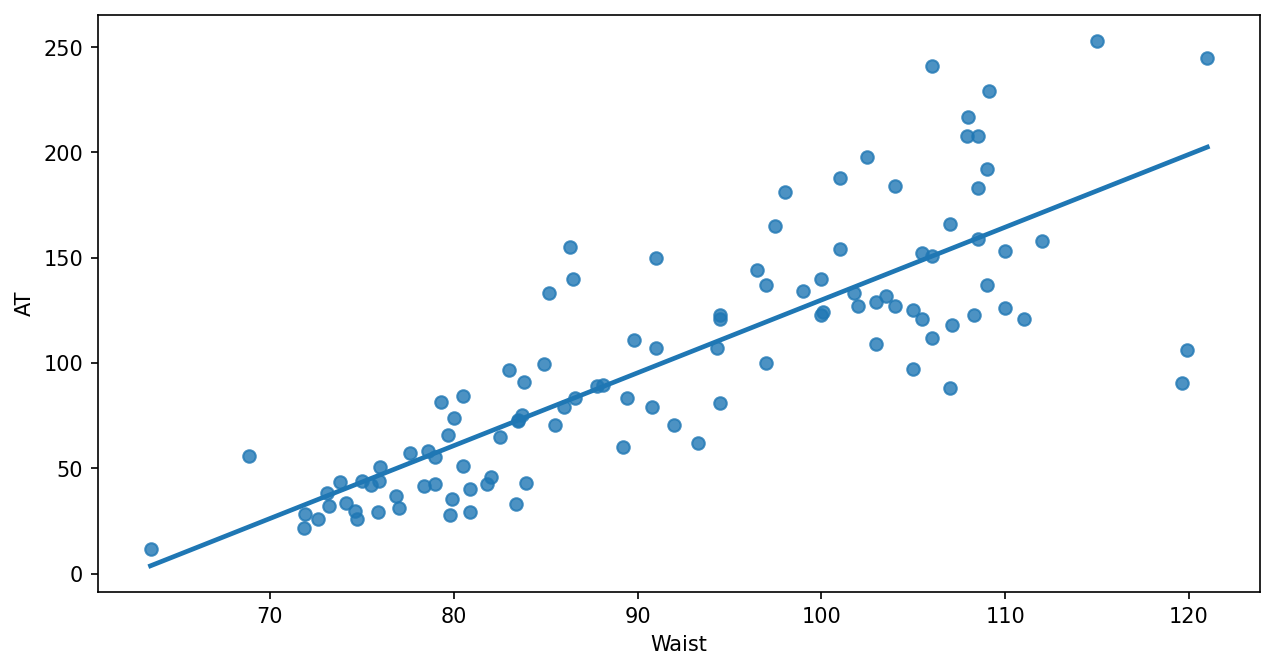

In [30]:
sns.regplot(x="Waist",y="AT",data=df,ci=None)



## **predit for new data points**

In [31]:
#predict for 200 and 300 daily circulation
newdata=pd.Series([40,75,120])#x value is (daily circulation) 200 at one branch and 300 at another branch
newdata

,0
0,40
1,75
2,120


In [35]:
data_pred=pd.DataFrame(newdata,columns=['Wiest'])
data_pred

,Wiest
0,40
1,75
2,120


In [36]:
model.predict(data_pred)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Waist' is not defined
    AT~Waist
       ^^^^^

In [ ]:
#create a dala frame using a dictionary
data_pred2=pd.DataFrame({"daily":[120,250,720,450,640,900]})
data_pred2

,daily
0,120
1,250
2,720
3,450
4,640
5,900


In [ ]:
model.predict(data_pred2)

,0
0,174.601401
1,348.764319
2,978.430255
3,616.707271
4,871.253075
5,1219.578912


## **data transformation**
1.sqrt





2.log

In [ ]:
#skew ness reduces by keeping an outliers


# **1.log transformation**

In [ ]:
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [ ]:
df["log_daily"]=np.log(df["daily"])  #we create an another column
df

,daily,sunday,log daily,lg_sunday,log_sunday,log_daily
0,391.952,488.506,5.971139,6.191352,6.191352,5.971139
1,516.981,798.298,6.248006,6.682482,6.682482,6.248006
2,355.628,235.084,5.873885,5.459943,5.459943,5.873885
3,238.555,299.451,5.474600,5.701951,5.701951,5.474600
4,537.780,559.093,6.287450,6.326316,6.326316,6.287450
5,733.775,1133.249,6.598202,7.032844,7.032844,6.598202
6,198.832,348.744,5.292460,5.854338,5.854338,5.292460
7,252.624,417.779,5.531902,6.034953,6.034953,5.531902
8,206.204,344.522,5.328866,5.842158,5.842158,5.328866
9,231.177,323.084,5.443184,5.777912,5.777912,5.443184


In [ ]:
df["log_sunday"]=np.log(df["sunday"])
df

,daily,sunday,log daily,lg_sunday,log_sunday
0,391.952,488.506,5.971139,6.191352,6.191352
1,516.981,798.298,6.248006,6.682482,6.682482
2,355.628,235.084,5.873885,5.459943,5.459943
3,238.555,299.451,5.474600,5.701951,5.701951
4,537.780,559.093,6.287450,6.326316,6.326316
5,733.775,1133.249,6.598202,7.032844,7.032844
6,198.832,348.744,5.292460,5.854338,5.854338
7,252.624,417.779,5.531902,6.034953,6.034953
8,206.204,344.522,5.328866,5.842158,5.842158
9,231.177,323.084,5.443184,5.777912,5.777912


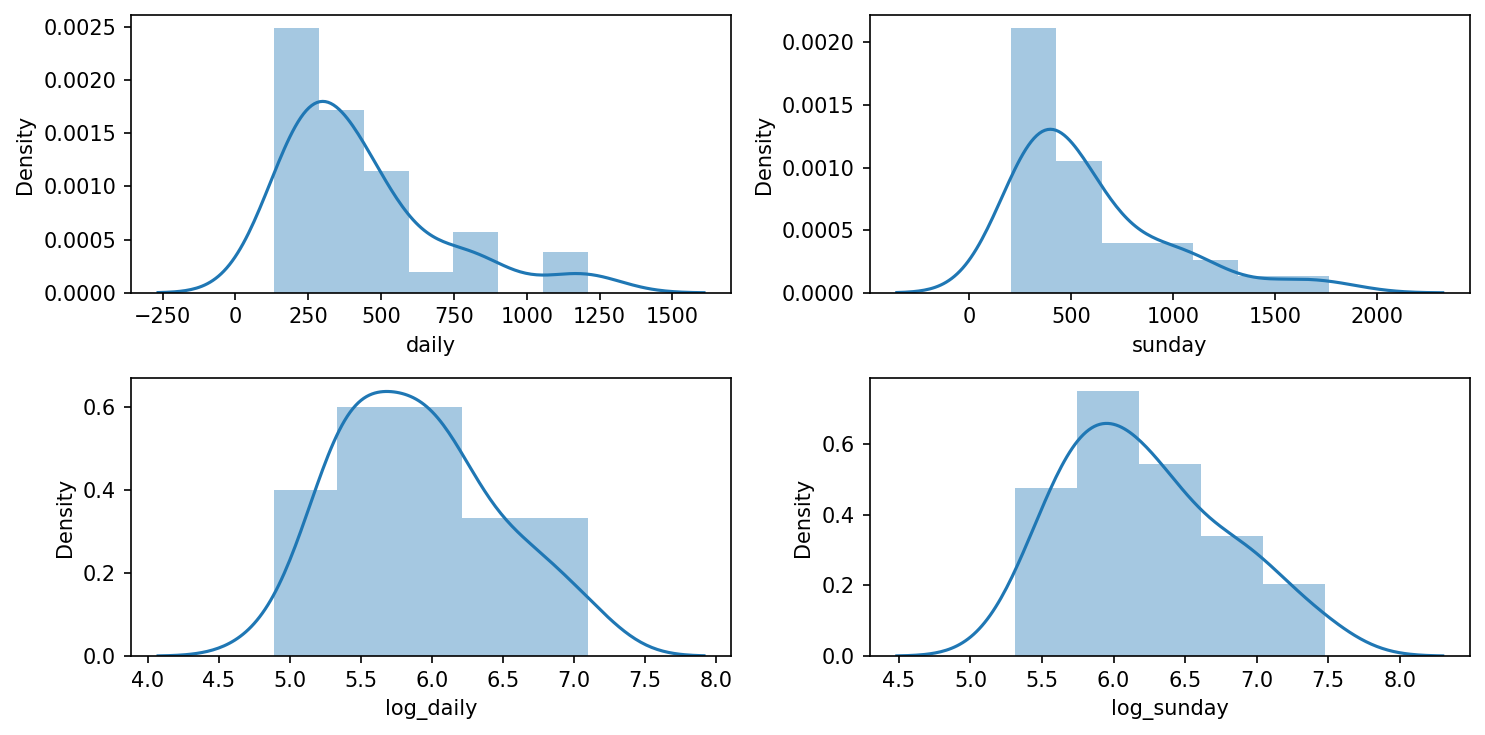

In [ ]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])
plt.subplot(2,2,2)
sns.distplot(df['sunday'])
plt.subplot(2,2,3)
sns.distplot(df['log_daily'])
plt.subplot(2,2,4)
sns.distplot(df['log_sunday'])
plt.tight_layout()
#compare previous skewness will be reduced when comaparision between normal and log

In [ ]:
df['log_daily'].skew(),df["log_sunday"].skew()  #moderate skewness is there
#to remove all skewness we have all outliers from data

(0.4682202000020356, 0.5337572087816101)

In [ ]:
df['daily'].skew(),df["sunday"].skew()#comapre skewness in original and log

(1.5321591323040094, 1.5644730738925112)

## 2.square root transformation

In [ ]:
df["sqrt_daily"]=np.sqrt(df["daily"])
df["sqrt_sunday"]=np.sqrt(df["sunday"])
df

,daily,sunday,log daily,lg_sunday,log_sunday,log_daily,sqrt_daily,sqrt_sunday
0,391.952,488.506,5.971139,6.191352,6.191352,5.971139,19.797778,22.102172
1,516.981,798.298,6.248006,6.682482,6.682482,6.248006,22.737216,28.254168
2,355.628,235.084,5.873885,5.459943,5.459943,5.873885,18.858102,15.332449
3,238.555,299.451,5.474600,5.701951,5.701951,5.474600,15.445226,17.304653
4,537.780,559.093,6.287450,6.326316,6.326316,6.287450,23.190084,23.645147
5,733.775,1133.249,6.598202,7.032844,7.032844,6.598202,27.088282,33.663764
6,198.832,348.744,5.292460,5.854338,5.854338,5.292460,14.100780,18.674689
7,252.624,417.779,5.531902,6.034953,6.034953,5.531902,15.894150,20.439643
8,206.204,344.522,5.328866,5.842158,5.842158,5.328866,14.359805,18.561304
9,231.177,323.084,5.443184,5.777912,5.777912,5.443184,15.204506,17.974538


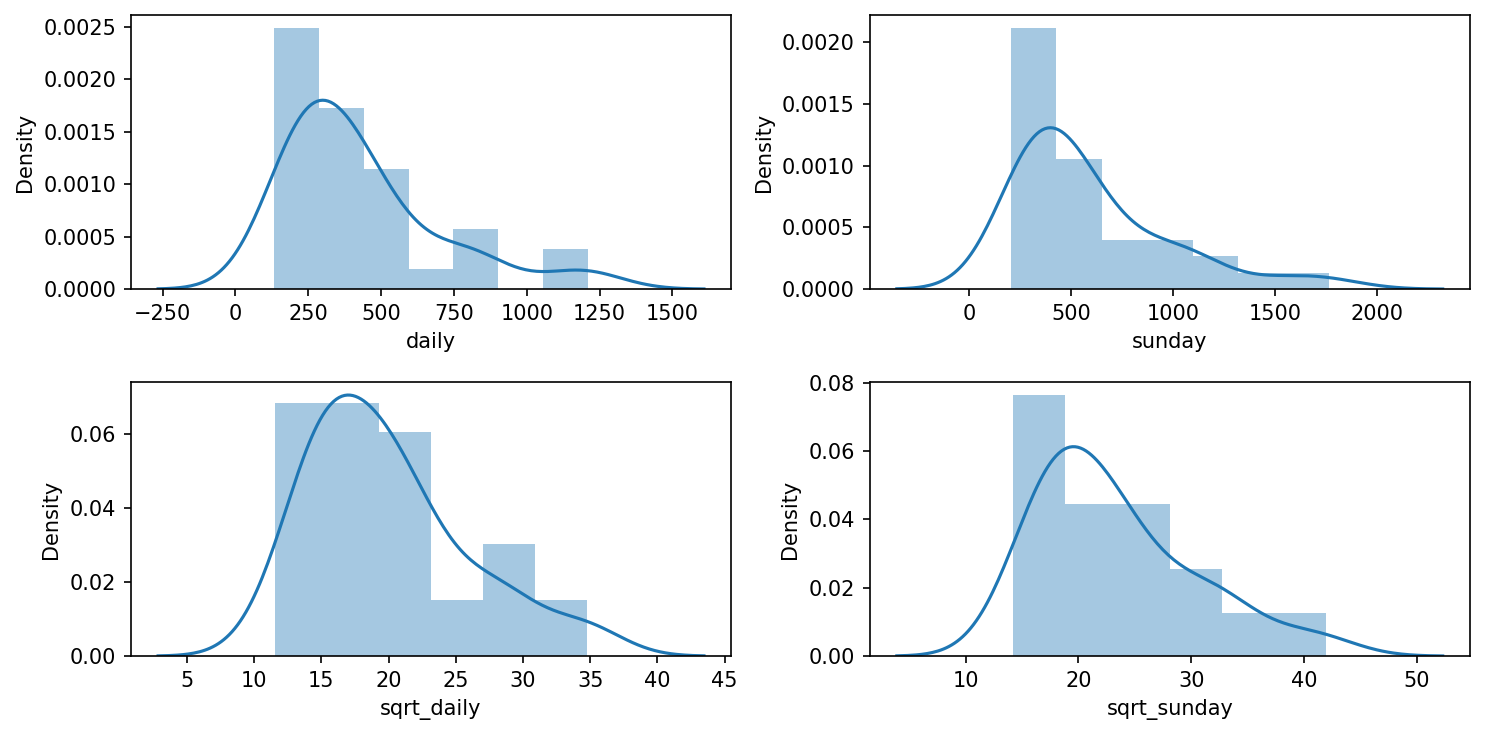

In [ ]:
plt.subplot(2,2,1)
sns.distplot(df['daily'])
plt.subplot(2,2,2)
sns.distplot(df['sunday'])
plt.subplot(2,2,3)
sns.distplot(df['sqrt_daily'])
plt.subplot(2,2,4)
sns.distplot(df['sqrt_sunday'])
plt.tight_layout()

In [ ]:
#log will more better than sqrt